In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('work_from_home_burnout_dataset.csv')
df

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low
...,...,...,...,...,...,...,...,...,...,...,...
1795,180,Weekend,6.33,8.16,0,4,0,5.59,73.5,31.91,Low
1796,180,Weekend,4.70,7.88,0,4,0,6.69,89.8,26.30,Low
1797,180,Weekend,3.92,6.39,2,1,0,6.77,74.6,34.07,Low
1798,180,Weekday,8.93,11.11,2,5,0,8.28,74.6,38.14,Low


In [45]:
df_day_ours = df['work_hours'].mean()
print(df_day_ours)

6.515116666666666


In [46]:
weekdays = df[df['day_type'] == 'Weekday']['work_hours'].mean()
weekend = df[df['day_type'] == 'Weekend']['work_hours'].mean()

avg_weekdays = weekdays.mean()
avg_weekend = weekend.mean()

print(f"Average work hours on weekdays: {avg_weekdays:.2f}")
print(f"Average work hours on weekends: {avg_weekend:.2f}")

weekly_work_hours = (avg_weekdays * 5) + (avg_weekend * 2 )
print(f"Average work hours on week: {weekly_work_hours:.2f}")

Average work hours on weekdays: 8.56
Average work hours on weekends: 4.58
Average work hours on week: 51.94


In [47]:
weekdays_task = df[df['day_type'] == 'Weekday']['task_completion_rate'].mean()
weekend_task = df[df['day_type'] == 'Weekend']['task_completion_rate'].mean()
print(f"Average task completion rate on weekdays: {weekdays_task:.2f}")
print(f"Average task completion rate on weekends: {weekend_task:.2f}")

Average task completion rate on weekdays: 70.52
Average task completion rate on weekends: 74.01


In [48]:
burnt_out_high = df[df['burnout_risk'] == 'High']
averages = burnt_out_high[['work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken','sleep_hours','task_completion_rate']].median().round(2)

print(averages)

work_hours               8.36
screen_time_hours       10.78
meetings_count           2.00
breaks_taken             3.50
sleep_hours              7.30
task_completion_rate    40.00
dtype: float64


In [49]:
burnt_out_medium = df[df['burnout_risk'] == 'Medium']
averages_medium = burnt_out_medium[['work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken','sleep_hours','task_completion_rate']].median().round(2)
print(averages_medium)

work_hours               7.15
screen_time_hours        9.66
meetings_count           2.00
breaks_taken             3.00
sleep_hours              6.96
task_completion_rate    47.60
dtype: float64


In [50]:
burnt_out_lowkey = df[df['burnout_risk'] == 'Low']
averages_low = burnt_out_lowkey[['work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken','sleep_hours','task_completion_rate']].median().round(2)
print(averages_low)

work_hours               6.35
screen_time_hours        9.09
meetings_count           2.00
breaks_taken             3.00
sleep_hours              6.99
task_completion_rate    77.50
dtype: float64


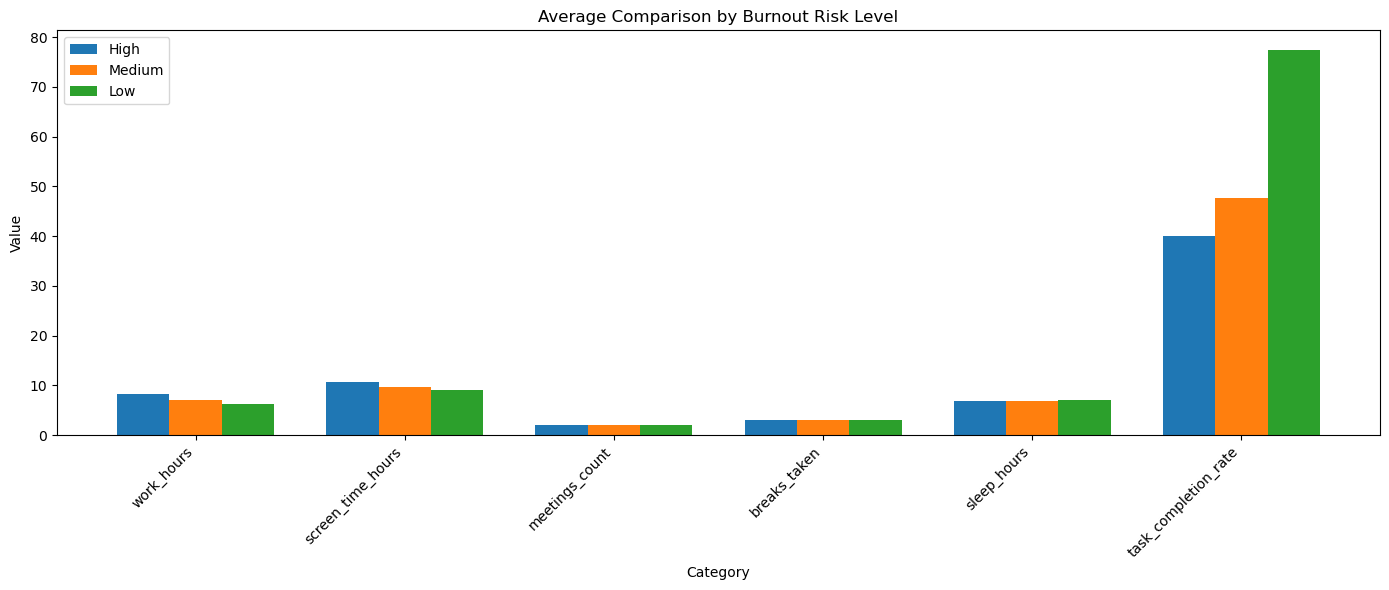

In [51]:
import matplotlib.pyplot as plt
import numpy as np


categories = ['work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken', 'sleep_hours', 'task_completion_rate']

high = [8.36, 10.78, 2.05, 3.01, 6.97, 40.00]
medium = [7.15, 9.66, 2.00, 3.00, 6.96, 47.60]  
low = [6.35, 9.09, 2.00, 3.00, 6.99, 77.50]


x = np.arange(len(categories))
width = 0.25


fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - width, high, width, label='High')
ax.bar(x, medium, width, label='Medium')
ax.bar(x + width, low, width, label='Low')

ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Average Comparison by Burnout Risk Level')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [52]:
result = df.groupby('burnout_risk')['user_id'].nunique().reset_index()
result.columns = ['burnout_risk', 'number_of_users']

print(result)


  burnout_risk  number_of_users
0         High                7
1          Low              180
2       Medium               81


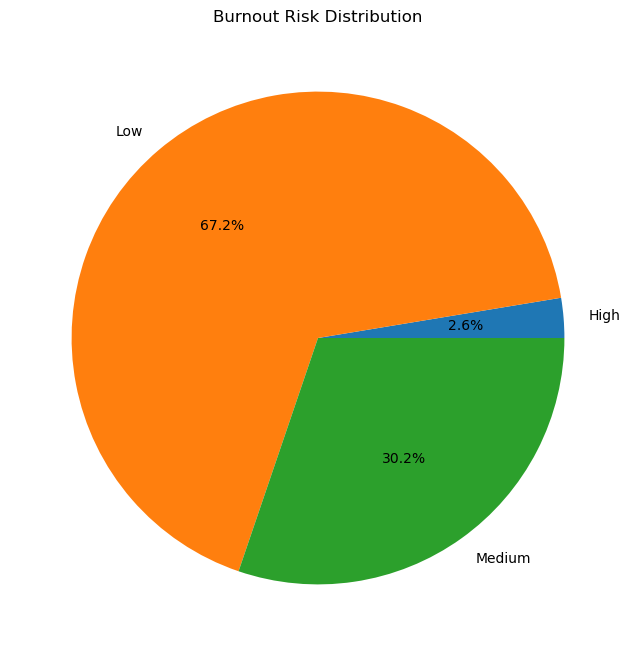

In [53]:
labels = ['High', 'Low', 'Medium']
sizes = [7, 180, 81]


plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Burnout Risk Distribution')
plt.show()

In [54]:
weekdays = df[df['day_type'] == 'Weekday']
averages_weekdays = weekdays[['work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken','sleep_hours','task_completion_rate']].median().round(2)
print(averages_weekdays)

work_hours               8.53
screen_time_hours       11.36
meetings_count           3.00
breaks_taken             3.00
sleep_hours              7.01
task_completion_rate    72.90
dtype: float64


In [55]:
weekenddays = df[df['day_type'] == 'Weekend']
averages_weekend = weekenddays[['work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken','sleep_hours','task_completion_rate']].median().round(2)
print(averages_weekend)

work_hours               4.48
screen_time_hours        7.27
meetings_count           1.00
breaks_taken             3.00
sleep_hours              6.98
task_completion_rate    76.45
dtype: float64


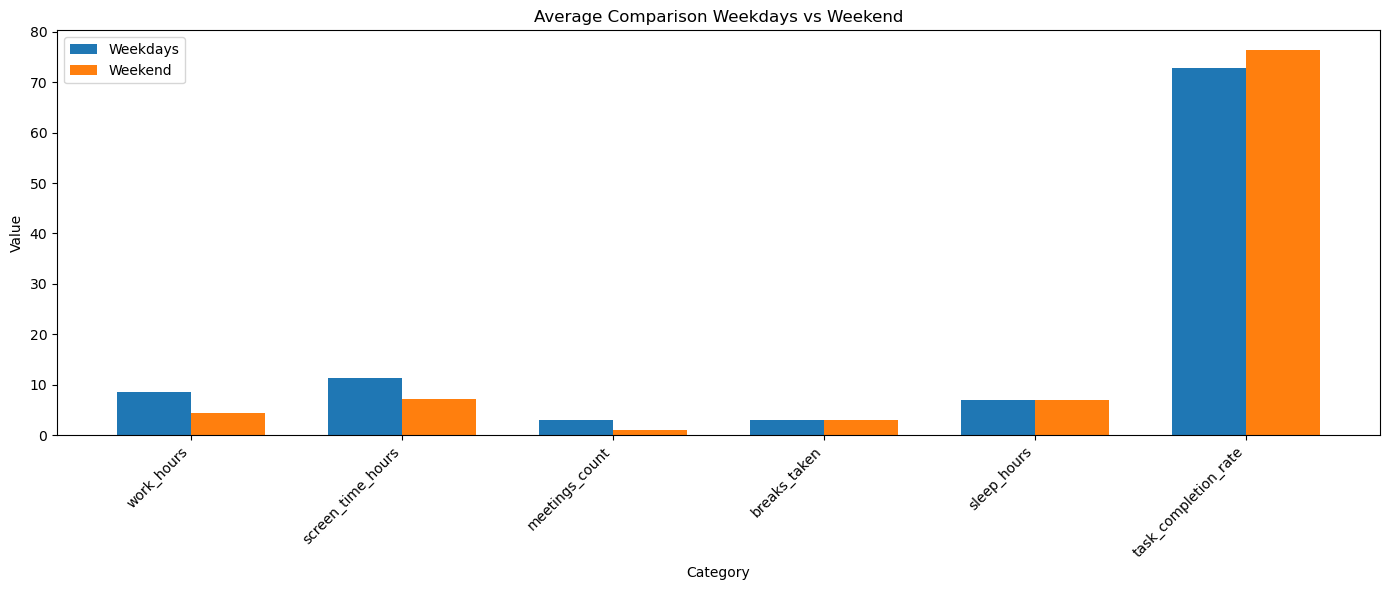

In [56]:
import matplotlib.pyplot as plt
import numpy as np


categories = ['work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken', 'sleep_hours', 'task_completion_rate']

weekdays = averages_weekdays.tolist()
weekend = averages_weekend.tolist()


x = np.arange(len(categories))
width = 0.35


fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - width/2, weekdays, width, label='Weekdays')
ax.bar(x + width/2, weekend, width, label='Weekend')

ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Average Comparison Weekdays vs Weekend')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [57]:
# Correlation analysis with burnout score
# Calculate correlation between key work metrics and burnout level
burnout_correlation = df[['work_hours', 'screen_time_hours', 'meetings_count', 
                           'breaks_taken', 'sleep_hours', 'task_completion_rate']].corrwith(df['burnout_score'])

print(burnout_correlation.sort_values(ascending=False))

# Interpretation of Results

# task_completion_rate (-0.96) - STRONGEST NEGATIVE correlation
# Higher task completion = lower burnout (strong protective factor)

# sleep_hours (-0.006) - ALMOST NO correlation
# Sleep hours show minimal relationship with burnout in this dataset

# screen_time_hours (0.12) - WEAK POSITIVE correlation
# More screen time = slightly higher burnout risk

# work_hours (0.12) - WEAK POSITIVE correlation
# Similar to screen time: more work hours = slightly elevated burnout

# Key Finding:
# Task completion rate is by far the strongest predictor of burnout
# Employees who complete their tasks efficiently have significantly lower burnout scores

screen_time_hours       0.122636
work_hours              0.119319
meetings_count          0.084996
breaks_taken            0.003992
sleep_hours            -0.006151
task_completion_rate   -0.960015
dtype: float64
